['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 49

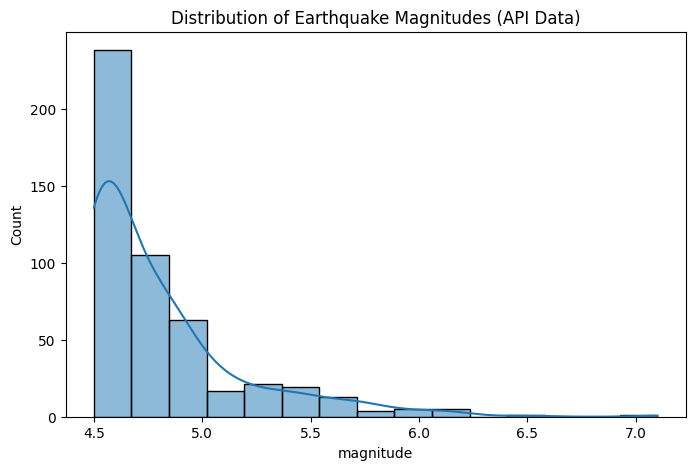

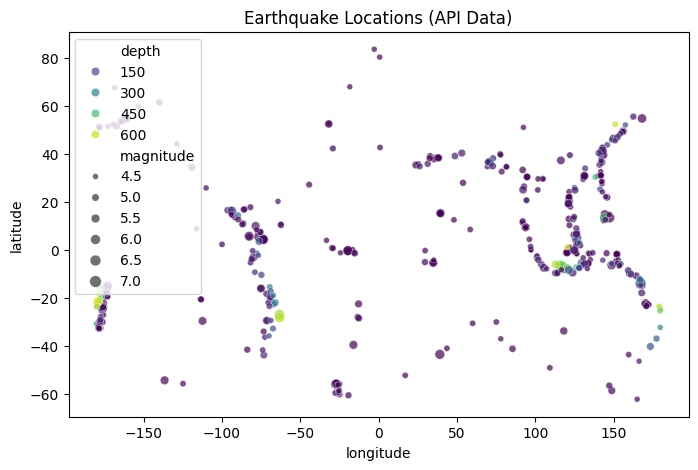

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()


records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)
print(df_api.columns.tolist())

# --- EDA ---
print(df_api.describe())
print(df_api.info())

# --- Visualizations ---
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()




['Magnitude', 'Depth', 'Latitude', 'Longitude', 'Soil_Type', 'Impact_Level']
   Magnitude       Depth   Latitude   Longitude Soil_Type Impact_Level
0   4.872701  158.129127  31.086539   35.747743     Rocky          Low
1   7.753572  146.358654  53.402651    4.934828     Rocky          Low
2   6.659970   12.564409 -44.915778  -76.253571      Clay       Medium
3   5.993292  105.668109  22.477338 -177.672831     Rocky       Medium
4   3.780093  117.157708  12.914277   -1.353880     Rocky          Low
         Magnitude        Depth     Latitude    Longitude
count  1500.000000  1500.000000  1500.000000  1500.000000
mean      5.496785   152.626648    -1.914066    -0.265102
std       1.470075    85.365819    51.332285   104.278027
min       3.023160     5.003432   -89.994471  -179.918266
25%       4.187720    80.932869   -46.530073   -90.548375
50%       5.532809   153.975350    -2.241029    -3.809832
75%       6.768347   227.565468    41.266769    90.546130
max       7.998588   299.512516  

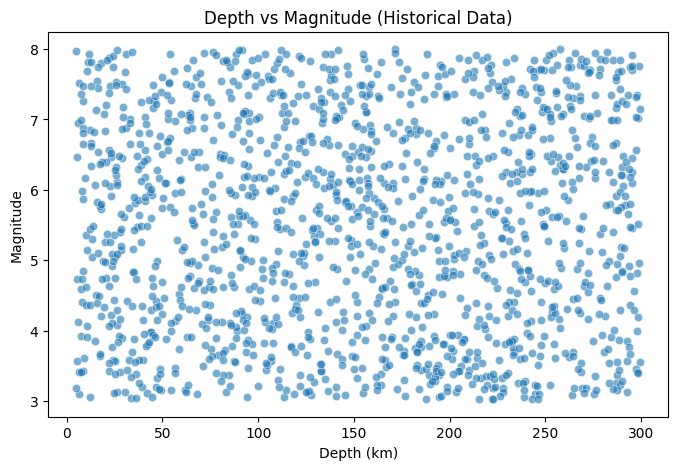

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_hist = pd.read_csv("data/earthquake_impact_dataset.csv")
print(df_hist.columns.tolist())
print(df_hist.head())

# Select relevant columns


# --- EDA ---
print(df_hist.describe())
print("Missing values:", df_hist.isnull().sum())

# ✅ If your dataset includes a 'Year' column
if 'Year' in df_hist.columns:
    avg_mag = df_hist.groupby('Year')['Magnitude'].mean().reset_index()

    plt.figure(figsize=(10,5))
    sns.lineplot(data=avg_mag, x='Year', y='Magnitude', marker='o')
    plt.title("Average Magnitude of Earthquakes Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Magnitude")
    plt.grid(True)
    plt.show()

# Depth vs Magnitude scatter
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x="Depth", y="Magnitude", alpha=0.6)
plt.title("Depth vs Magnitude (Historical Data)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()


In [36]:
print(df_hist.head())
print(df_hist.columns.tolist())


    Latitude   Longitude       Depth  Magnitude Location      Source  \
0  31.086539   35.747743  158.129127   4.872701  Unknown  Historical   
1  53.402651    4.934828  146.358654   7.753572  Unknown  Historical   
2 -44.915778  -76.253571   12.564409   6.659970  Unknown  Historical   
3  22.477338 -177.672831  105.668109   5.993292  Unknown  Historical   
4  12.914277   -1.353880  117.157708   3.780093  Unknown  Historical   

   Soil_Type  Impact_Level  
0        NaN           NaN  
1        NaN           NaN  
2        NaN           NaN  
3        NaN           NaN  
4        NaN           NaN  
['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'Soil_Type', 'Impact_Level']


In [107]:
print(df_hist.columns.tolist())


['Magnitude', 'Depth', 'Latitude', 'Longitude', 'Soil_Type', 'Impact_Level']


['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']
Number of earthquake points: 782

Soil type distribution:
soil_type
65535    557
4470      10
4484       9
13448      4
4354       4
        ... 
37622      1
11741      1
6997       1
27062      1
3873       1
Name: count, Length: 154, dtype: int64


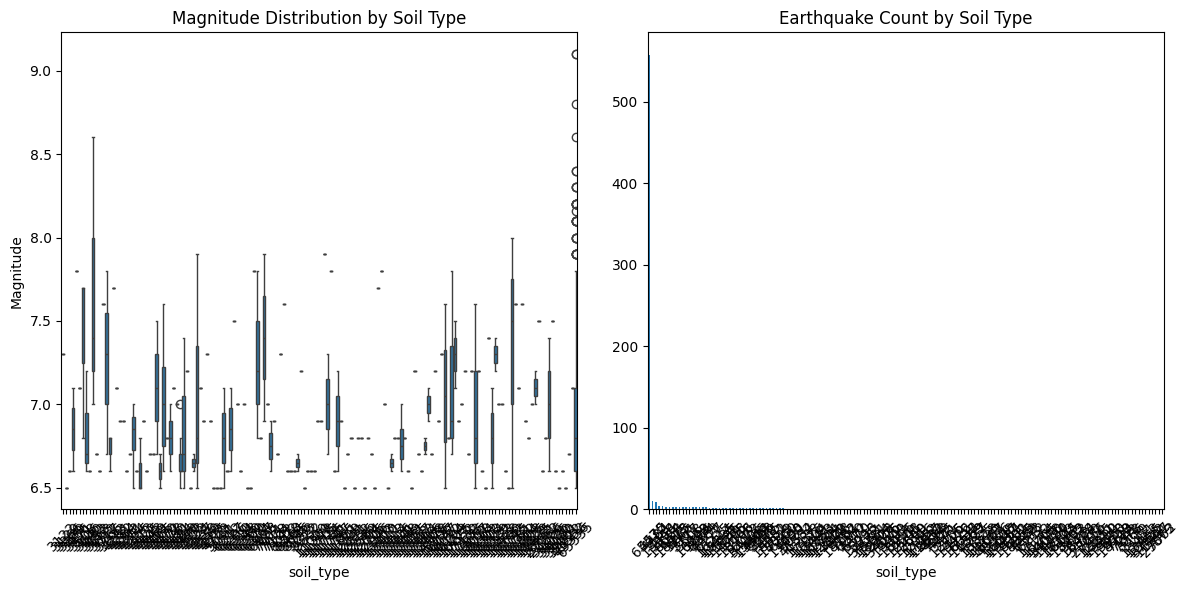

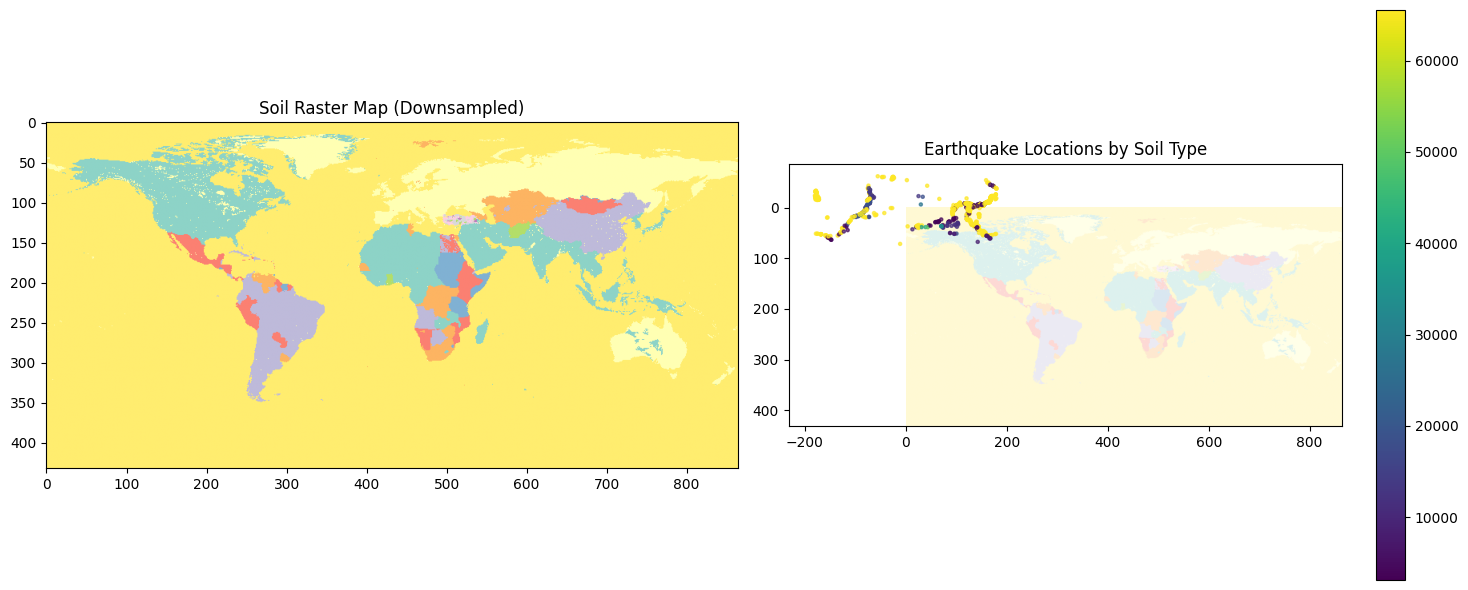


Statistical summary by soil type:
           count      mean       std  min  max
soil_type                                     
3122           1  7.300000       NaN  7.3  7.3
3129           1  6.500000       NaN  6.5  6.5
3366           1  6.600000       NaN  6.6  6.6
3389           2  6.850000  0.353553  6.6  7.1
3456           1  7.800000       NaN  7.8  7.8
...          ...       ...       ...  ...  ...
34061          1  6.600000       NaN  6.6  6.6
37622          1  6.500000       NaN  6.5  6.5
41582          1  6.700000       NaN  6.7  6.7
49336          1  7.100000       NaN  7.1  7.1
65535        557  6.947684  0.464013  6.5  9.1

[154 rows x 5 columns]


In [8]:
# step-3 Integrate Soil data

import geopandas as gpd
import rasterio
from rasterio.enums import Resampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# -------------------------------
# 1. Load earthquake data
# -------------------------------
df_eq = pd.read_csv("data/earthquake_data.csv")
# Rename columns for consistency
print(df_eq.columns.tolist())

df_eq.rename(columns={'latitude': 'Latitude', 'longitude': 'Longitude', 'magnitude': 'Magnitude'}, inplace=True)

# Convert to GeoDataFrame
eq_points = gpd.GeoDataFrame(
    df_eq,
    geometry=gpd.points_from_xy(df_eq.Longitude, df_eq.Latitude),
    crs="EPSG:4326"
)
print(f"Number of earthquake points: {len(eq_points)}")

# -------------------------------
# 2. Load HWSD raster (downsampled for visualization)
# -------------------------------
raster_path = "HWSD2_RASTER/HWSD2.bil"  # Update your path

with rasterio.open(raster_path) as src:
    # For visualization: downsample raster
    factor = 50
    soil_raster_small = src.read(
        1,
        out_shape=(
            int(src.height / factor),
            int(src.width / factor)
        ),
        resampling=Resampling.nearest
    )
    transform_small = src.transform * src.transform.scale(
        (src.width / soil_raster_small.shape[1]),
        (src.height / soil_raster_small.shape[0])
    )
    raster_crs = src.crs

    # Reproject earthquake points to raster CRS
    eq_points = eq_points.to_crs(raster_crs)

    # Extract soil type at each earthquake location
    coords = [(pt.x, pt.y) for pt in eq_points.geometry]
    eq_points['soil_type'] = [val[0] for val in src.sample(coords)]

# -------------------------------
# 3. EDA and Plots
# -------------------------------
# Soil type distribution
print("\nSoil type distribution:")
print(eq_points['soil_type'].value_counts())

# Magnitude distribution by soil type
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=eq_points, x='soil_type', y='Magnitude')
plt.title("Magnitude Distribution by Soil Type")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
eq_points['soil_type'].value_counts().plot(kind='bar')
plt.title("Earthquake Count by Soil Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Map visualization (downsampled raster)
# -------------------------------
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

# Plot 1: Soil raster
ax1.imshow(soil_raster_small, cmap='Set3', origin='upper')
ax1.set_title("Soil Raster Map (Downsampled)")

# Plot 2: Earthquakes over soil raster
ax2.imshow(soil_raster_small, cmap='Set3', alpha=0.3, origin='upper')
eq_points.plot(ax=ax2, column='soil_type', legend=True, markersize=5, alpha=0.7)
ax2.set_title("Earthquake Locations by Soil Type")

plt.tight_layout()
plt.show()

# -------------------------------
# 5. Statistical summary
# -------------------------------
print("\nStatistical summary by soil type:")
stats_by_soil = eq_points.groupby('soil_type')['Magnitude'].agg(['count','mean','std','min','max'])
print(stats_by_soil)






Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

=== INITIAL DATA CHECK ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float

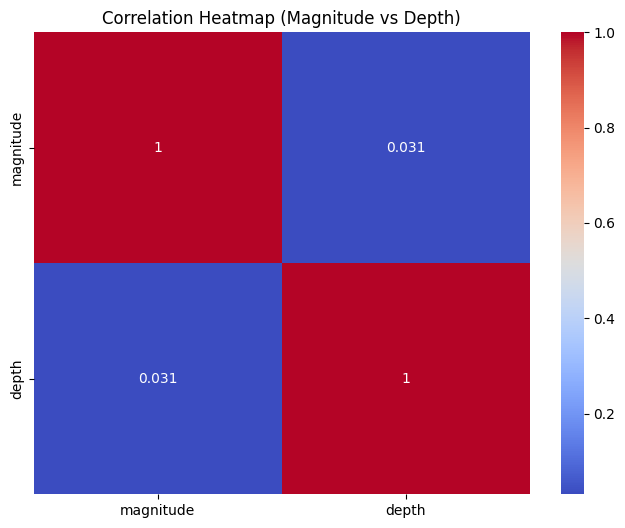

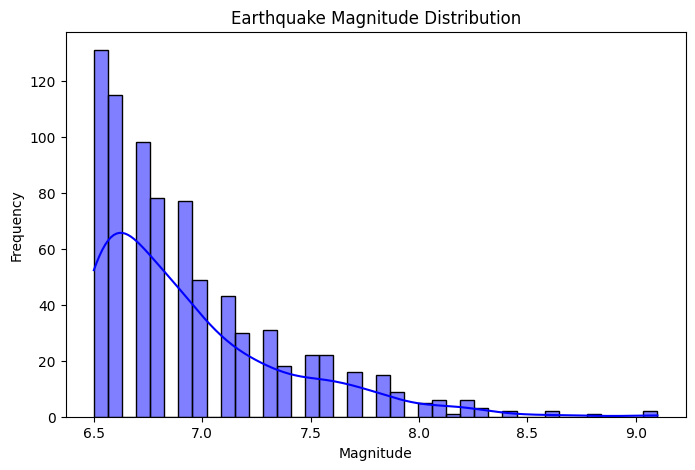

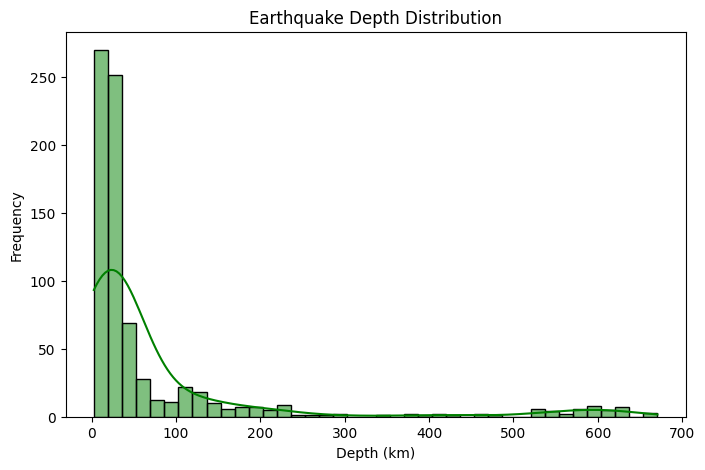

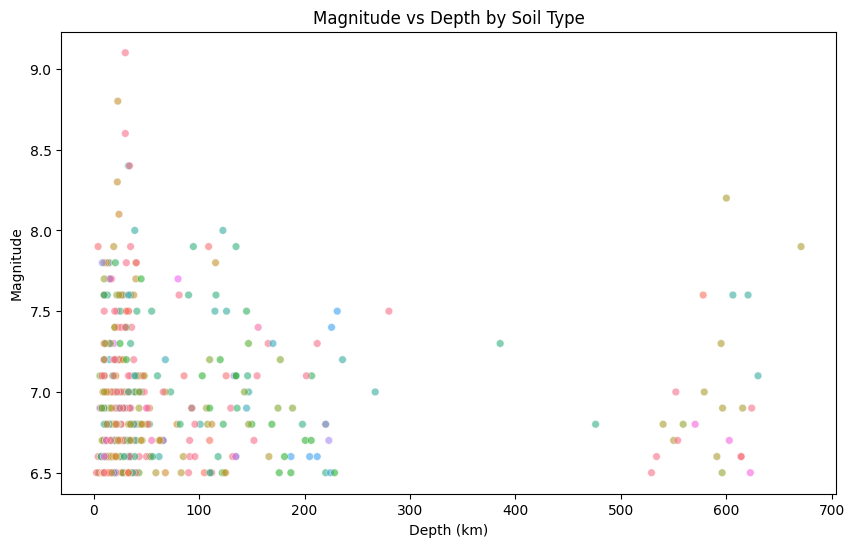

C:\Users\Kavya\AppData\Local\Temp\ipykernel_25608\741102529.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


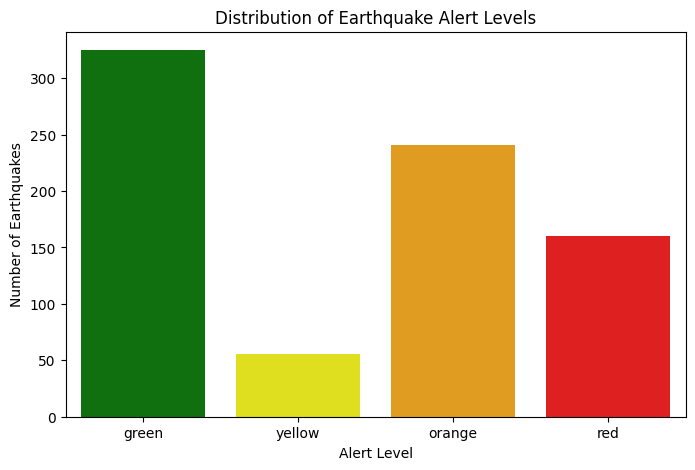

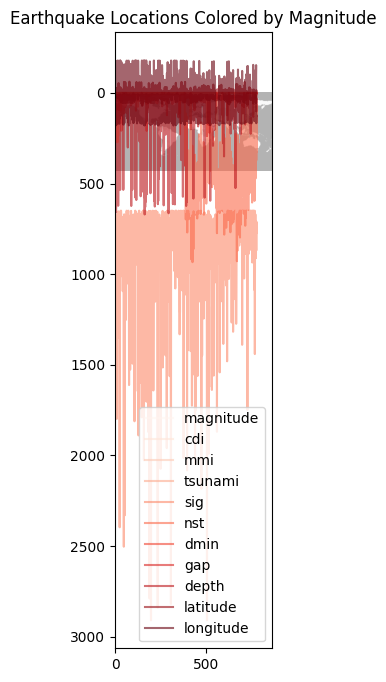

['Solomon Islands' nan 'Fiji' 'Panama' 'Mexico' 'Taiwan'
 'Papua New Guinea' "People's Republic of China" 'Philippines' 'Brazil'
 'Peru' 'Argentina' 'Indonesia' 'United States of America' 'Antarctica'
 'Vanuatu' 'Haiti' 'Japan' 'Mongolia' 'Greece' 'Chile' 'Russia' 'Turkey'
 'United Kingdom of Great Britain and Northern Ireland (the)' 'Ecuador'
 'South Georgia and the South Sandwich Islands' 'Venezuela' 'Bolivia'
 'Costa Rica' 'Iran' 'Guatemala' 'Botswana' 'New Zealand' 'Italy'
 'Myanmar' 'Afghanistan' 'India' 'Tajikistan' 'Nepal' 'Nicaragua'
 'Pakistan' 'Colombia' 'Canada' 'Tonga' 'Kyrgyzstan' 'Martinique'
 'Mozambique' 'Tanzania' 'Algeria' 'El Salvador']

Number of unique countries: 49


In [19]:
# -------------------------------
# Step 4: Additional EDA
# -------------------------------

# 1. Missing values check
eq_points = pd.read_csv("data/earthquake_data.csv")

print(eq_points.columns)

# --- Initial Check ---
print("\n=== INITIAL DATA CHECK ===")
print(eq_points.info())
print("\nMissing values per column:")
print(eq_points.isna().sum())

#---------------------------------
# 🔹 Handle missing alert values intelligently
# ---------------------------------
def assign_alert(row):
    if pd.notna(row['alert']):
        return row['alert']
    # Infer alert based on magnitude and depth
    if row['magnitude'] >= 7:
        return 'red'
    elif row['magnitude'] >= 6:
        return 'orange'
    elif row['magnitude'] >= 5:
        return 'yellow'
    else:
        return 'green'

eq_points['alert'] = eq_points.apply(assign_alert, axis=1)

# ✅ Check that missing alerts are now filled
print("\nUpdated alert value distribution:")
print(eq_points['alert'].value_counts())



# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_points[['magnitude','depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_points['magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_points['depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
# Sample size should not exceed number of rows
sample_size = min(5000, len(eq_points))

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_points.sample(sample_size, random_state=42),  # sample for clarity
    x="depth", y="magnitude", hue="country", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()



# 7. Alert level distribution
plt.figure(figsize=(8,5))
sns.countplot(
    data=eq_points,
    x='alert',
    order=['green','yellow','orange','red'],
    palette=['green','yellow','orange','red']
)
plt.title("Distribution of Earthquake Alert Levels")
plt.xlabel("Alert Level")
plt.ylabel("Number of Earthquakes")
plt.show()


# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# Downsampled raster for visualization
ax.imshow(soil_raster_small, cmap='Greys', alpha=0.3, origin='upper')
eq_points.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()
print(eq_points['country'].unique())
print("\nNumber of unique countries:", eq_points['country'].nunique())




API dataset columns: ['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
Historical dataset columns: ['Magnitude', 'Depth', 'Latitude', 'Longitude', 'Soil_Type', 'Impact_Level']
Merging datasets with all unique columns and preserving real values...

✅ Merge complete — unified columns retained.
Unified dataset shape: (1992, 9)
Columns in merged dataset:
['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Soil_Type', 'Impact_Level', 'Source', 'Location', 'time']

Non-null counts after merge:
Latitude        1992
Longitude       1992
Magnitude       1992
Depth           1992
Soil_Type       1500
Impact_Level    1500
Source          1992
Location        1992
time             492
dtype: int64

Sample merged rows:
       Latitude   Longitude  Magnitude       Depth Soil_Type Impact_Level  \
1725  56.245288 -120.058723   3.534903   22.137126     Rocky          Low   
1282  17.903005  139.174359   3.997712  298.010230      Clay          Low   
442  -43.431904   90.460413   7.537832   

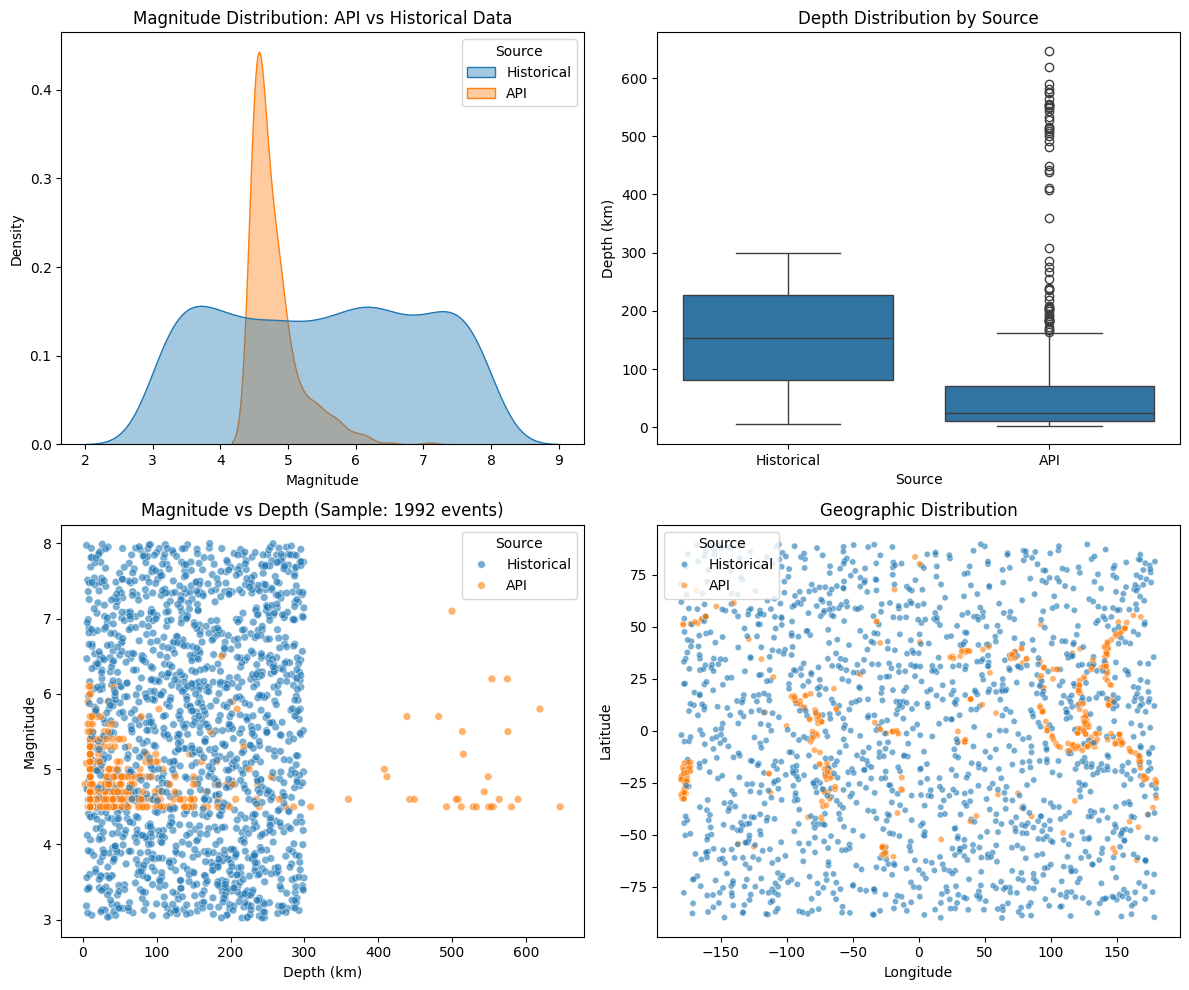

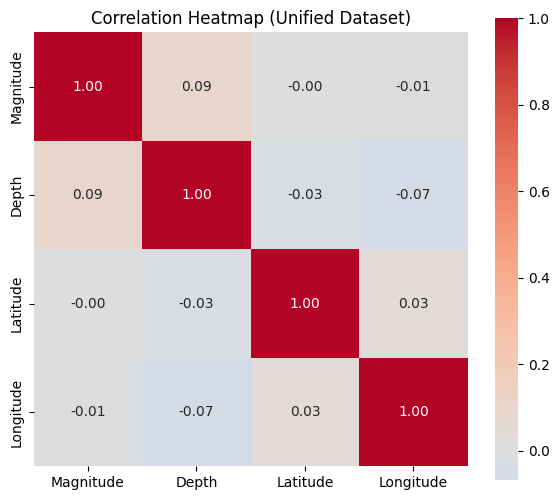

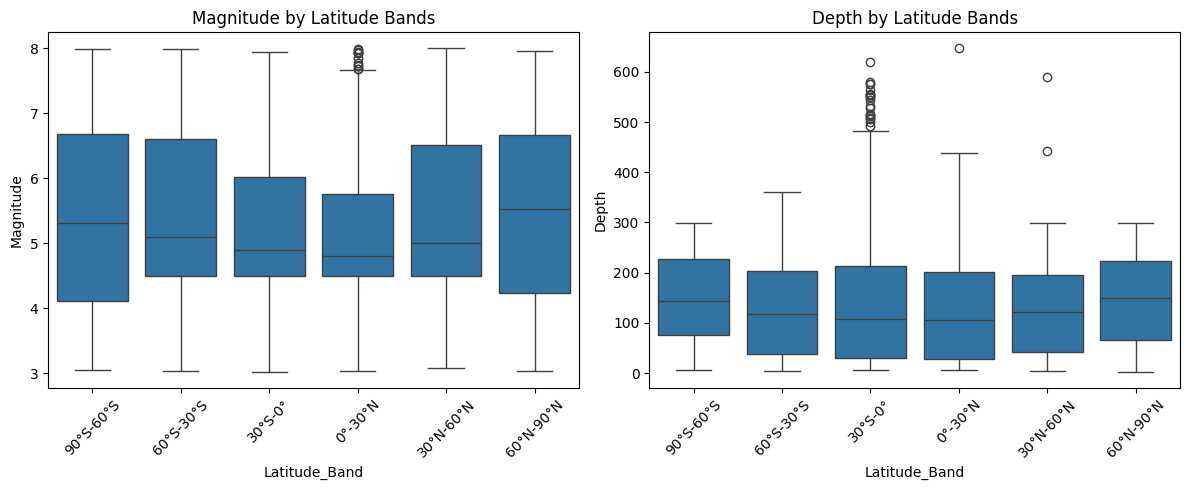


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 1,992
Geographic range: Lat(-90.0 to 89.9)
                 Lon(-179.9 to 179.9)
Magnitude range: 3.0 to 8.0
Depth range: 3.0 to 646.5 km

=== DATA QUALITY CHECK ===
Missing values per column:
Latitude            0
Longitude           0
Magnitude           0
Depth               0
Soil_Type         492
Impact_Level      492
Source              0
Location            0
time             1500
merge_id            0
DOMSOI           1992
Latitude_Band       0
dtype: int64

Soil data coverage: 0.0%

Unified dataset saved to: unified_earthquake_data.csv


In [20]:
# --- Step 5: Comprehensive EDA for Historical CSV + Raster Soil ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix column naming issues
df_api = df_api.rename(columns={
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location",
    "soil_type": "Soil_Type",
    "impact_level": "Impact_Level"
})

df_hist = df_hist.rename(columns={
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location",
    "soil_type": "Soil_Type",
    "impact_level": "Impact_Level"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in either dataset
for df in [df_api, df_hist]:
    if 'Location' not in df.columns:
        df['Location'] = "Unknown"

# ✅ Keep all unique columns (union)
# ✅ Merge datasets while keeping all unique columns and preserving valid values
print("Merging datasets with all unique columns and preserving real values...")

# Ensure both datasets contain the same important columns before merging
important_cols = ['Soil_Type', 'Impact_Level', 'Location', 'Depth', 'Magnitude']

for col in important_cols:
    if col not in df_api.columns:
        df_api[col] = np.nan
    if col not in df_hist.columns:
        df_hist[col] = np.nan

# Concatenate both datasets — this collects all unique columns
df_all = pd.concat([df_hist, df_api], ignore_index=True, sort=False)

# Group by coordinate and keep first non-null record per location
df_all = df_all.groupby(['Latitude', 'Longitude'], as_index=False).first()

print("\n✅ Merge complete — unified columns retained.")
print("Unified dataset shape:", df_all.shape)
print("Columns in merged dataset:")
print(df_all.columns.tolist())

print("\nNon-null counts after merge:")
print(df_all.notna().sum())

print("\nSample merged rows:")
print(df_all.sample(5))


# --- Step 3. Quick check for Impact Level ---
if 'Impact_Level' in df_all.columns:
    print("\nImpact Level Distribution:")
    print(df_all['Impact_Level'].value_counts(dropna=False))
else:
    print("\n⚠️ Warning: 'Impact_Level' column not found after merge!")

# --- Step 4. Attach Soil/Geological Data ---
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it.")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Exploratory Data Analysis ---
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# --- Step 6. Distribution and Comparison Plots ---
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# --- Step 7. Correlation Analysis ---
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")
plt.show()

# --- Step 8. Soil Type Analysis ---
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# --- Step 9. Spatial Analysis ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# --- Step 10. Summary Statistics ---
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# --- Step 11. Data Quality Check ---
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# --- Step 12. Save the unified dataset ---
df_all_geo.to_csv('dataset/unified_earthquake_data.csv', index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")



In [45]:
# Step 6: Data Cleaning and Missing Value Imputation

import pandas as pd

# Load the unified dataset
df = pd.read_csv("dataset/unified_earthquake_data.csv")

# 1️⃣ Check missing values before cleaning
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# 2️⃣ Imputation strategy
# Numeric columns: fill missing values with median
num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Categorical columns: fill missing values with mode
cat_cols = ['Soil_Type', 'Impact_Level']

for col in cat_cols:
    if col in df.columns:
        # Only fill if there's at least one non-null value
        if df[col].dropna().empty:
            df[col] = df[col].fillna('Unknown')
        else:
            df[col] = df[col].fillna(df[col].mode()[0])


# 3️⃣ Confirm missing values are handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

import os

# 4️⃣ Save cleaned dataset
os.makedirs("dataset", exist_ok=True)
df.to_csv("dataset/earthquake_cleaned_day1.csv", index=False)
print("\nCleaned dataset saved to: earthquake_cleaned_day1.csv")


Missing values per column before cleaning:
Latitude            0
Longitude           0
Magnitude           0
Depth               0
Soil_Type         492
Impact_Level      492
Source              0
Location            0
merge_id            0
DOMSOI           1992
Latitude_Band       0
dtype: int64

Missing values after imputation:
Latitude            0
Longitude           0
Magnitude           0
Depth               0
Soil_Type           0
Impact_Level        0
Source              0
Location            0
merge_id            0
DOMSOI           1992
Latitude_Band       0
dtype: int64

Cleaned dataset saved to: earthquake_cleaned_day1.csv


In [47]:
#t

import pandas as pd

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("dataset/earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv("dataset/earthquake_scaled_day2.csv", index=False)


          Magnitude         Depth
count  1.992000e+03  1.992000e+03
mean   8.560756e-17  9.274152e-17
std    1.000251e+00  1.000251e+00
min   -1.739396e+00 -1.270921e+00
25%   -6.233562e-01 -9.012229e-01
50%   -2.455089e-01 -1.139494e-01
75%    7.807433e-01  7.523854e-01
max    2.020508e+00  5.011601e+00


In [55]:
#w
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("dataset/earthquake_scaled_day2.csv")

# Encode Soil Type (soil_type)
if 'Soil_Type' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['Soil_Type'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['Soil_Type', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv("dataset/earthquake_encoded_day3.csv", index=False)


  Soil_Type  SoilType_Encoded
0     Sandy                 2
1     Rocky                 1
2      Clay                 0
3     Sandy                 2
4     Rocky                 1


In [59]:
#t
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("dataset/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)
# ✅ Ensure Risk_Score has no invalid values
df['Risk_Score'] = df['Risk_Score'].replace([np.inf, -np.inf], np.nan)
df['Risk_Score'] = df['Risk_Score'].fillna(df['Risk_Score'].mean())

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv("dataset/earthquake_features_day4.csv", index=False)


   Magnitude     Depth  Risk_Score  Region_Cluster
0   1.405734 -0.189245    0.921077               2
1  -0.009223  0.576670    0.130138               2
2  -0.775425 -0.134697   -0.586201               4
3   1.063699  0.750504    0.912561               1
4  -1.334013 -1.246792   -0.004998               1


c:\Users\Kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
#f
# Load latest version
df_final = pd.read_csv("dataset/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("dataset/earthquake_preprocessed_week2.csv", index=False)


Final dataset shape: (1992, 17)
Final columns: ['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Soil_Type', 'Impact_Level', 'Source', 'Location', 'merge_id', 'DOMSOI', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']
